<span style="color:red">Abgegeben von (Name, Vorname):</span> 
**Elsherif, Mohamed**

In [38]:
import nltk
import pprint
import pandas as pd

Immer griffbereit:
- Website: https://www.nltk.org/
- Buch: https://www.nltk.org/book/ch06.html
- Module: https://www.nltk.org/py-modindex.html
- Beispiele: http://www.nltk.org/howto/

<p style="line-height:1.4"><font size="6"><strong>11. Sitzung: Textklassifikation</strong></font></p> 

In den bisherigen Sitzungen haben wir Analyseverfahren für Worte und Sätze betrachtet. Sätze treten aber nicht isoliert auf und viele NLP-Aufgaben beziehen sich auf Texte, wobei ein Text auch aus einem einzelnen Satz bestehen kann. Die Satzgrenzen spielen bei diesen Klassifikationsaufgaben im Allgemeinen keine Rolle. 

Man kann **zwei Arten** von Textklassifikation unterscheiden:

1) Zum einen kann man bestimmte abstrakte **Merkmale eines Textes** ermitteln (Text $\to$ Label):
  - Sprache: Englisch, Deutsch, Chinesisch, ...
  - Muttersprache des Autors: Englisch, Deutsch, Chinesisch, ...
  - Genre: News, Fiction, Chat, wissenschaftliche Arbeit, ...
  - Thema: Sport, Politik, Kunst, Technik, ...
  - Affekt/Sentiment: gut, schlecht
  - Politische Einstellung: pro/contra Tempolimit, ...
  - Dialog Act Type: Grüßen, Fragen, Antworten, Behaupten, Klarstellen, ... 
  - ...

2) Zum anderen kann man auch die **Beziehung zwischen zwei Texten** bestimmen (Text,Text $\to$ Label): 
  - Textual Entailment
  - Zeitliche Reihenfolge
  - ...

  
Die Verfahren bei der Textklassifikation unterscheiden sich je nach Implizitheit und Kontextabhängigkeit der Klassen erheblich. Um das **breite Spektrum** deutlich zu machen, werden wir uns in diesem Notebook mit zwei sehr unterschiedlichen Beispielen des ersten Typs (Text $\to$ Label) beschäftigen: 
- Sprachidentifikation 
- Sentiment Analysis


# Sprachidentifikation mit N-Grammen

Die Identifikation der Sprache eines (unbekannten) Textes ist oft der erste Schritte in einer Verarbeitungspipeline. Erst wenn die Sprache geklärt ist, können die spachspezifischen Tools sinnvoll angewandt werden. Glücklicherweise reichen für die Sprachidentifikation tatsächlich schon die **N-Gramme der enthaltenen Buchstaben** aus. 

Das klassische N-Gramm-Verfahren wurde von [Cavnar & Trenkl (1994)](http://www.let.rug.nl/~vannoord/TextCat/textcat.pdf) beschrieben und hat den folgenden Aufbau:

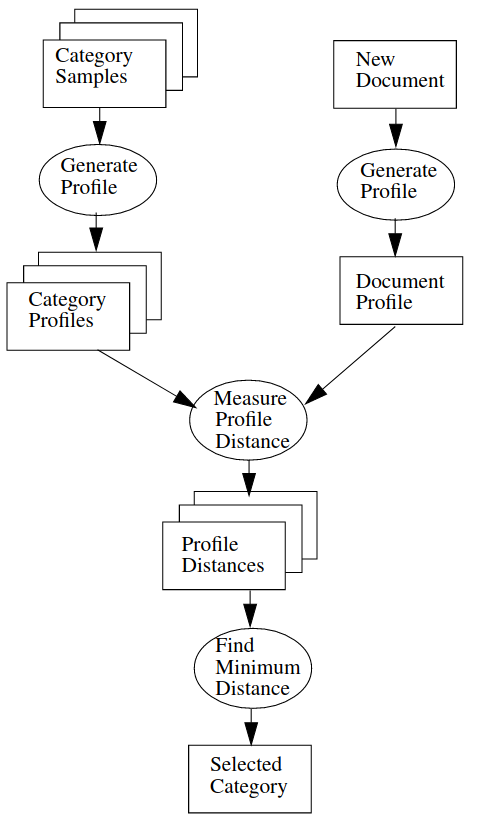

Die grobe Idee ist, aus den Daten, die für die Sprache vorliegen, und dem Eingabe-Text jeweils **N-Gramm-Profile** zu erstellen und diese miteinander zu vergleich. <span style="color:red"> (Frage am Rande: Handelt es sich um überwachtes oder nicht-überwachtes Lernen?</span>

Für die Erzeugung der **Buchstaben-N-Gramme** kann man z.B. auf die NLTK-Funktion `ngrams` zurückgreifen.

In [39]:
from nltk import ngrams

text = "In den bisherigen Sitzungen haben wir Analyseverfahren für Worte und Sätze betrachtet."


def get_ngrams(text, n):
    return [''.join(gram) for gram in list(ngrams(text, n))]


get_ngrams(text, 3)[:10]

['In ', 'n d', ' de', 'den', 'en ', 'n b', ' bi', 'bis', 'ish', 'she']

Die so erzeugten N-Gramme haben eine **Zipf'sche Frequenzverteilung**, d.h. nur wenige N-Gramme treten sehr häufig auf. Dies wird im Folgenden für die Erstellung der Profile wichtig sein:

In [40]:
from nltk.probability import FreqDist

my_ngrams_fd = FreqDist(get_ngrams(text, 3))

my_ngrams_fd.most_common(10)

[('en ', 5),
 ('gen', 2),
 ('In ', 1),
 ('n d', 1),
 (' de', 1),
 ('den', 1),
 ('n b', 1),
 (' bi', 1),
 ('bis', 1),
 ('ish', 1)]

Um das Profil für eine Sprache zu erstellen, brauchen wir natürlich mehr Daten. Hierfür bietet sich das NLTK-Corpus `udhr`, das die [Allgemeine Erklärung der Menschenrechte](https://de.wikipedia.org/wiki/Allgemeine_Erkl%C3%A4rung_der_Menschenrechte) in 300 Sprachen enthält. 

In [41]:
from nltk.corpus import udhr
nltk.download('udhr')

print("Die im UDHR-Corpus enthaltenen Sprachen:")
udhr.fileids()

Die im UDHR-Corpus enthaltenen Sprachen:


[nltk_data] Downloading package udhr to
[nltk_data]     /Users/dr.elsherif/nltk_data...
[nltk_data]   Package udhr is already up-to-date!


['Abkhaz-Cyrillic+Abkh',
 'Abkhaz-UTF8',
 'Achehnese-Latin1',
 'Achuar-Shiwiar-Latin1',
 'Adja-UTF8',
 'Afaan_Oromo_Oromiffa-Latin1',
 'Afrikaans-Latin1',
 'Aguaruna-Latin1',
 'Akuapem_Twi-UTF8',
 'Albanian_Shqip-Latin1',
 'Amahuaca',
 'Amahuaca-Latin1',
 'Amarakaeri-Latin1',
 'Amuesha-Yanesha-UTF8',
 'Arabela-Latin1',
 'Arabic_Alarabia-Arabic',
 'Asante-UTF8',
 'Ashaninca-Latin1',
 'Asheninca-Latin1',
 'Asturian_Bable-Latin1',
 'Aymara-Latin1',
 'Balinese-Latin1',
 'Bambara-UTF8',
 'Baoule-UTF8',
 'Basque_Euskara-Latin1',
 'Batonu_Bariba-UTF8',
 'Belorus_Belaruski-Cyrillic',
 'Belorus_Belaruski-UTF8',
 'Bemba-Latin1',
 'Bengali-UTF8',
 'Beti-UTF8',
 'Bichelamar-Latin1',
 'Bikol_Bicolano-Latin1',
 'Bora-Latin1',
 'Bosnian_Bosanski-Cyrillic',
 'Bosnian_Bosanski-Latin2',
 'Bosnian_Bosanski-UTF8',
 'Breton-Latin1',
 'Bugisnese-Latin1',
 'Bulgarian_Balgarski-Cyrillic',
 'Bulgarian_Balgarski-UTF8',
 'Cakchiquel-Latin1',
 'Campa_Pajonalino-Latin1',
 'Candoshi-Shapra-Latin1',
 'Caquinte-Latin

In [42]:
udhr.raw('German_Deutsch-Latin1')[:300]

'Die Allgemeine Erklärung der Menschenrechte\nResolution 217 A (III) vom 10.12.1948 \n\nPräambel\nDa die Anerkennung der angeborenen Würde und der gleichen und unveräußerlichen Rechte aller Mitglieder der Gemeinschaft der Menschen die Grundlage von Freiheit, Gerechtigkeit und Frieden in der Welt bildet, '

Mit dem UDHR-Corpus können wir mit wenig Aufwand N-Gramm-Frequenzverteilungen aus **thematisch identischen Daten** gewinnen: 

In [43]:
english_udhr = udhr.raw('English-Latin1').replace('\n', ' ').replace('  ', ' ')
german_udhr = udhr.raw(
    'German_Deutsch-Latin1').replace('\n', ' ').replace('  ', ' ')
dutch_udhr = udhr.raw(
    'Dutch_Nederlands-Latin1').replace('\n', ' ').replace('  ', ' ')

max_rank = 15

df = pd.DataFrame({'Englisch': FreqDist(get_ngrams(english_udhr, 3)).most_common(max_rank),
                   'Deutsch': FreqDist(get_ngrams(german_udhr, 3)).most_common(max_rank),
                   'Niederländisch': FreqDist(get_ngrams(dutch_udhr, 3)).most_common(max_rank)},
                  index=range(1, max_rank+1)
                  )
print(df)

      Englisch     Deutsch Niederländisch
1   ( th, 136)  (en , 163)     (en , 271)
2   (the, 134)  (er , 148)     (an , 102)
3   ( an, 115)  (der, 120)      (de , 99)
4   (he , 112)   (nd , 96)      ( de, 95)
5   (and, 102)   ( un, 95)      (ing, 86)
6   (nd , 101)   (und, 94)      (van, 86)
7    (ion, 98)   (ein, 85)      ( va, 85)
8    ( of, 85)   (ung, 83)      ( en, 85)
9    (tio, 84)   (cht, 83)      ( he, 84)
10   ( to, 83)   (ich, 79)      (cht, 79)
11   (of , 81)   ( de, 68)      (der, 69)
12   (to , 81)   (sch, 66)      (ech, 62)
13   ( in, 66)   (che, 61)      ( ge, 61)
14   (al , 62)   (ech, 59)      (n v, 60)
15   (ati, 61)   (ie , 58)      (et , 59)


Man beachte nur, dass der Umfang der Daten, die für jede Sprache vorliegen, relativ gering sind. 

In [44]:
print("Anzahl der Token im deutschen UDHR-Datensatz:", len(german_udhr))

Anzahl der Token im deutschen UDHR-Datensatz: 9948


## Vorbereitung der Sprach- und Dokument-Profile

Zunächst müssen wir ein paar Parameter festelegen:
- `n`: Größe der N-Gramme 
- `k`: Bereich der Frequenzverteilung

[Cavnar & Trenkl (1994)](http://www.let.rug.nl/~vannoord/TextCat/textcat.pdf) schlagen vor, N-Gramme der Größe 1–5 und die 300 häufigsten N-Gramme zu verwenden.

Hierfür definieren wir zunächst eine Funktion `get_ngram_fd(text,min_n,max_n)`, die für eine Texteingabe ein `FreqDist`-Objekt für alle N-Gramme zwischen `min_n`und `max_n` ausgibt: 

In [45]:
def get_ngram_fd(text, min_n=1, max_n=5):
    ngrams = []
    for n in range(min_n, max_n + 1):
        ngrams += get_ngrams(text, n)
    return FreqDist(ngrams)


german_ngram_fd = get_ngram_fd(german_udhr)
english_ngram_fd = get_ngram_fd(english_udhr)

Mit der Funktion `get_ngram_profile()` können wir nun die N-Gramm-Profile einer Sprache erzeugen, indem einfach die `k` häufigsten N-Gramme ausgegeben werden:

In [46]:
def get_ngram_profile(ngram_fd, k):
    return [ngram for ngram, count in ngram_fd.most_common(k)]


english_ngram_profile = get_ngram_profile(english_ngram_fd, 300)
german_ngram_profile = get_ngram_profile(german_ngram_fd, 300)

print("Das N-Gramm-Profil für das Deutsche: {}".format(german_ngram_profile))

Das N-Gramm-Profil für das Deutsche: ['e', ' ', 'n', 'i', 'r', 't', 'd', 'h', 'a', 's', 'u', 'l', 'er', 'en', 'g', 'c', 'ch', 'n ', 'ei', 'un', 'de', ' d', 'e ', 'r ', 'en ', 'nd', 't ', 'er ', 'o', 'f', 'in', 'ge', 'der', 'ie', 'm', 'ng', 'te', ',', ', ', 'der ', 'd ', 'he', 'b', 're', 'nd ', ' u', ' un', 'und', 'k', 'z', 'ne', 'ht', 'ein', 'ung', 'cht', 'und ', 'ic', 'ich', ' und', ' und ', 'it', 'w', 'es', ' s', ' a', 's ', ' de', 'A', ' A', 'sc', 'be', 'se', 'sch', 'le', 'di', 'ha', 'el', 'an', 'li', 'ti', 'che', 'g ', 'at', 'ec', 'ech', ' g', 'ie ', ' i', 'echt', 'ke', 'ig', 'da', 'ine', 'ng ', 'gen', '.', 'eine', 'ung ', 'st', 'eit', ' der', 'al', 'ed', 'zu', '. ', 'die', ' da', 'R', 'v', 'G', 'ns', ' R', ' G', ' der ', 'h ', ' di', 'ch ', ' die', 'ä', 'Re', 'rt', 'au', 'nt', ' Re', ' e', 'f ', 'hen', 'll', 'ru', 'ü', ' z', 'chen', ' h', 'uf', ' zu', 'em', 'lic', 'Rec', 'lich', ' Rec', 'Rech', ' Rech', 'Recht', 't d', ' ge', 'die ', 'iche', ' die ', 'S', ' S', 'rei', ' ha', 'on',

Nun fehlen nur noch die Testdaten. Hier benötigen wir der Vergleichbarkeit wegen wieder ein [paralleles Corpus](https://en.wikipedia.org/wiki/Parallel_text), d.h. ein und derselbe Text in unterschiedlichen Sprachen. Eine zu große Varianz, was Themen und Textgenres betrifft, würden einen Vergleich erschweren.

Glücklicherweise stellt das NLTK außerdem das Buch Genesis in mehreren Sprachen zur Verfügung:

In [47]:
from nltk.corpus import genesis

genesis.fileids()

['english-kjv.txt',
 'english-web.txt',
 'finnish.txt',
 'french.txt',
 'german.txt',
 'lolcat.txt',
 'portuguese.txt',
 'swedish.txt']

Hieraus mit können wir Textbeispiele z.B. für das Englische, Deutsche und [Lolspeak](https://de.wikipedia.org/wiki/Lolcat) verwenden, für die ebenfalls Profile erstellt werden:   

In [48]:
lolcat_text = genesis.raw('lolcat.txt')[:200]
german_text = genesis.raw('german.txt')[:200]
english_text = genesis.raw()[:200]

lolcat_text_ngram_fd = get_ngram_fd(lolcat_text)
german_text_ngram_fd = get_ngram_fd(german_text)
english_text_ngram_fd = get_ngram_fd(english_text)

lolcat_text_profile = get_ngram_profile(lolcat_text_ngram_fd, 300)
german_text_profile = get_ngram_profile(german_text_ngram_fd, 300)
english_text_profile = get_ngram_profile(english_text_ngram_fd, 300)

print(lolcat_text_profile)

[' ', 'e', 'i', 'a', 'n', 'd', 't', 'h', 'C', 's', 'r', 'n ', 'in', ' C', 'te', 'at', 't ', 'd ', 'b', 'g', 'l', 'A', 'o', 'h ', ' h', 'ha', 'de', 'An', ' d', 'e ', 'An ', '.', 'k', 'z', 'f', ' t', 'eh', ' b', 'Ce', 'ei', 'il', 'li', 'ng', 'g ', 'Ca', 'ad', 'ed', ' s', ' A', ' ha', ' te', 'teh', 'eh ', 'n C', ' Ce', 'Cei', 'eil', 'ili', 'lin', 'ing', 'ng ', 'g C', ' Ca', 'Cat', 'at ', 'ed ', ' An', ' teh', 'teh ', 'n Ce', ' Cei', 'Ceil', 'eili', 'ilin', 'ling', 'ing ', 'ng C', 'g Ca', ' Cat', 'Cat ', ' An ', ' teh ', 'n Cei', ' Ceil', 'Ceili', 'eilin', 'iling', 'ling ', 'ing C', 'ng Ca', 'g Cat', ' Cat ', 'm', 'U', ',', '\n', 'v', 'ez', 'z ', 'da', 'a ', ' U', 'Ur', 'rf', 'fs', ', ', ' n', 'no', '.\n', 'er', 'ade', 'ded', 'ez ', 'z A', ' da', 'a U', ' Ur', 'Urf', 'rfs', ' no', 'ate', 'd d', 'had', 'aded', 'ded ', 'ez A', 'z An', 'a Ur', ' Urf', 'Urfs', 'ed d', ' had', 'An C', 'aded ', 'ez An', 'z An ', 'a Urf', ' Urfs', 'An Ce', 'O', 'I', 'u', 'D', 'p', 'c', 'w', 'Oh', 'ai', 'i.', '. '

Nun können wir verschiedene **Vergleichsmetriken** für Sprach- und Dokument-Profile ausprobieren. Das Ziel ist, dass die Profile aus einer Sprache immer ähnlicher sind als die Profile aus unterschiedlichen Sprachen. 

## Überschneidung

Eine wirklich sehr einfache Methode, zwei Profile (das Sprach-Profil und das Dokument-Profil) miteinander zu vergleich, besteht darin, die Überschneidung in der Liste der häufigsten N-Gramme zu messen. Dafür kann die `set`-Methode `intersection()` verwendet werden:

In [49]:
def profile_overlap(profileA, profilaB, size=1):
    return len(set(profileA).intersection(set(profilaB)))/size

Angewandt auf unsere Profil-Paare ergeben sich schon **akzeptable Ergebnisse**. Das englische Dokument-Profil hat tatsächlich die größte Überschneidung mit dem englischen Sprach-Profil, während das deutsche Dokument-Profil die größte Überschneidung mit dem deutschen Sprach-Profil hat:

In [50]:
print("LANGUAGE/TEXT     English  German  Lolcat")
print("English           {:3}     {:3}    {:3}".format(profile_overlap(
    english_ngram_profile, english_text_profile), profile_overlap(
    english_ngram_profile, german_text_profile), profile_overlap(
    english_ngram_profile, lolcat_text_profile)))
print("German            {:3}     {:3}    {:3}".format(profile_overlap(
    german_ngram_profile, english_text_profile), profile_overlap(
    german_ngram_profile, german_text_profile), profile_overlap(
    german_ngram_profile, lolcat_text_profile)))

LANGUAGE/TEXT     English  German  Lolcat
English           104.0     73.0    85.0
German            82.0     105.0    78.0


## Ordnung

[Cavnar & Trenkl (1994)](http://www.let.rug.nl/~vannoord/TextCat/textcat.pdf) schlagen eine Metrik vor, die auch die Reihenfolge der Profile berücksichtigt, die sogenannte Out-of-Order-Metrik:

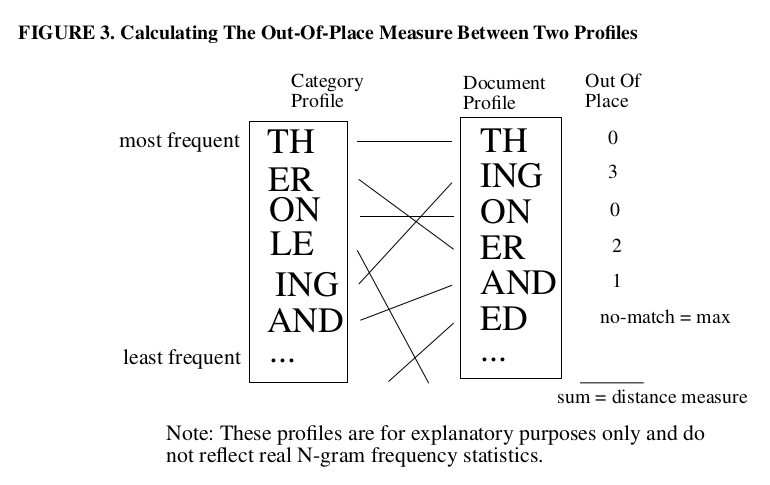

Es wird hierbei einfach der **Unterschied der Positionsindexe** für alle in den Profilen enthaltenen N-Gramme aufsummiert. Dies ist in der Funktion `out_of_order_distance()` implementiert:

In [51]:
def out_of_order_distance(list1, list2):
    '''Compute the out-of-order-distance of list1 and list2'''
    dist = 0
    for i in range(len(list1)):
        if list1[i] in list2:
            # out-of-order distance of one ngram
            dist += abs(i - list2.index(list1[i]))
        else:
            dist += len(list1) + 1  # penalty for missing ngrams
    return dist

Damit können wir wie oben einen Vergleich der vorliegenden Dokument- und Sprachprofile durchführen und erhalten ebenfalls die gewünschten relativen Ergebnisse:

In [52]:
print("LANGUAGE/TEXT     English  German  Lolcat")
print("English           {:3}    {:3}   {:3}".format(out_of_order_distance(
    english_ngram_profile, english_text_profile), out_of_order_distance(
    english_ngram_profile, german_text_profile), out_of_order_distance(
    english_ngram_profile, lolcat_text_profile)))
print("German            {:3}    {:3}   {:3}".format(out_of_order_distance(
    german_ngram_profile, english_text_profile), out_of_order_distance(
    german_ngram_profile, german_text_profile), out_of_order_distance(
    german_ngram_profile, lolcat_text_profile)))

LANGUAGE/TEXT     English  German  Lolcat
English           64217    72695   70934
German            71301    64790   71050


## Euklidischer Abstand

Wir können die Profile aber auch in numerische **Vektoren** umwandeln und als Punkte im euklidischen Raum behandeln: 

<img src="https://cmry.github.io/sources/eucos.png" alt="Drawing" style="width: 500px"/>

In diesem Schaubild entsprächen dann $A$ und $B$ einem Profil-Paar, deren Übereinstimmung mit Hilfe des **euklidischen Abstands** $d$ oder des **Kosinus** $\theta$ am Ursprung bestimmt werden könnte. 

Aber wie wandelt man N-Gramm-Profile in numerische Vektoren um? Die Häufigkeiten der N-Gramme je Sprache haben wir ja, aber in den Profilen stehen unterschiedliche N-Gramme oder die N-Gramme stehen an **unterschiedlicher Stelle**. 

Um die Vektoren aller N-Gramm-Profile **"auszurichten"**, verwenden wir im Folgenden das **N-Gramm-Profil des Englischen**. Das heißt, die Reihenfolge der N-Gramme dort gibt die Dimensionen/Koordinaten der Vektoren vor. Die Häufigkeiten stammen dagegen aus den `FreqDist`-Objekten für die einzelnen Sprachen.

In [53]:
# Common order of dimensions in profile vectors
dimensions = english_ngram_profile

english_ngram_vector = [english_ngram_fd[ngram] for ngram in dimensions]
german_ngram_vector = [german_ngram_fd[ngram] for ngram in dimensions]
english_text_ngram_vector = [english_text_ngram_fd[ngram]
                             for ngram in dimensions]
german_text_ngram_vector = [german_text_ngram_fd[ngram]
                            for ngram in dimensions]
lolcat_text_ngram_vector = [lolcat_text_ngram_fd[ngram]
                            for ngram in dimensions]

print("N-Gramm-Vektor für den deutschen Text:")
print(german_text_ngram_vector)

N-Gramm-Vektor für den deutschen Text:
[36, 21, 12, 3, 10, 7, 8, 12, 5, 12, 2, 4, 15, 5, 0, 2, 6, 0, 0, 7, 4, 4, 0, 1, 8, 0, 0, 1, 0, 0, 0, 0, 1, 7, 6, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 4, 0, 7, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 5, 0, 0, 0, 1, 0, 3, 6, 0, 0, 1, 0, 1, 2, 0, 3, 0, 0, 3, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 3, 0, 1, 0, 0, 1, 0, 0, 0, 4, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 6, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]


Für die Vektor-Kalkulationen verwenden wir das [`scipy`](https://scipy.org/)-Paket: 

In [54]:
from scipy import spatial
import numpy

Schließlich können wir die **Euklidische Distanz** für unsere Profil-Paare berechnen und erhalten Messergebnisse, die zwar in der Reihenfolge unseren Erwartungen entsprechen, deren absolute Werte aber sehr nah beeinander liegen:

In [55]:
print("LANGUAGE/TEXT     English    German    Lolcat")
print("English           {:.2f}    {:.2f}   {:.2f}".format(spatial.distance.euclidean(
    english_ngram_vector, english_text_ngram_vector), spatial.distance.euclidean(
    english_ngram_vector, german_text_ngram_vector), spatial.distance.euclidean(
    english_ngram_vector, lolcat_text_ngram_vector)))
print("German            {:.2f}    {:.2f}   {:.2f}".format(spatial.distance.euclidean(
    german_ngram_vector, english_text_ngram_vector), spatial.distance.euclidean(
    german_ngram_vector, german_text_ngram_vector), spatial.distance.euclidean(
    german_ngram_vector, lolcat_text_ngram_vector)))

LANGUAGE/TEXT     English    German    Lolcat
English           2811.40    2820.34   2817.71
German            2710.78    2710.55   2710.06


Das deutet darauf hin, dass die Vektoren zuerst normalisiert werden sollten. Das heißt uns interesiert eigentlich nur die Richtung der Vektoren, nicht deren Länge. Um dies abzumildern kann man die Vektoren **normalisieren**, z.B. indem wir jede Frequenz durch den Durchschnitt der Frequenzen im Vektor teilen:

In [56]:
def norm_tf(vector):
    mean_f = numpy.mean(vector)
    return [n/mean_f for n in vector]

Die damit gewonnenen Messwerte lassen zumindest vermuten, dass die Abstände zwischen den Profilen nun wieder "zuverlässiger" erfasst werden:

In [57]:
print("LANGUAGE/TEXT     English    German    Lolcat")
print("English           {:.2f}      {:.2f}     {:.2f}".format(spatial.distance.euclidean(
    norm_tf(english_ngram_vector), norm_tf(english_text_ngram_vector)), spatial.distance.euclidean(
    norm_tf(english_ngram_vector), norm_tf(german_text_ngram_vector)), spatial.distance.euclidean(
    norm_tf(english_ngram_vector), norm_tf(lolcat_text_ngram_vector))))
print("German            {:.2f}      {:.2f}     {:.2f}".format(spatial.distance.euclidean(
    norm_tf(german_ngram_vector), norm_tf(english_text_ngram_vector)), spatial.distance.euclidean(
    norm_tf(german_ngram_vector), norm_tf(german_text_ngram_vector)), spatial.distance.euclidean(
    norm_tf(german_ngram_vector), norm_tf(lolcat_text_ngram_vector))))

LANGUAGE/TEXT     English    German    Lolcat
English           22.01      31.79     29.33
German            31.74      24.02     24.44


## Kosinus-Ähnlichkeit

Da uns die Länge der Vektoren gar nicht interessiert, sondern vielmehr die **Richtung der Vektoren** (vom Ursprung), kann man auch gleich den [Kosinus](https://de.wikipedia.org/wiki/Kosinus-%C3%84hnlichkeit) $\theta$ (am Ursprung) betrachten, ohne die Frequenzen im Vektor zuvor normalisieren zu müssen.

<img src="https://cmry.github.io/sources/eucos.png" alt="Drawing" style="width: 500px"/>

Der Wertebereich ist hier $[0,1]$, wobei $0$ sehr unähnlich ist und $1$ sehr ähnlich.  

Die Ergebnisse sind zwar schwer mit dem Euklidischen Abstand vergleichbar, aber zumindest stimmt hier ebenfalls die Übereinstimmungsreihenfolge für unsere Profil-Paare:

In [58]:
from scipy import spatial

print("LANGUAGE/TEXT     English    German    Lolcat")
print("English           {:.3f}      {:.3f}     {:.3f}".format(1 -
      spatial.distance.cosine(english_ngram_vector, english_text_ngram_vector), 1 -
      spatial.distance.cosine(english_ngram_vector, german_text_ngram_vector), 1 -
      spatial.distance.cosine(english_ngram_vector, lolcat_text_ngram_vector)))
print("German            {:.3f}      {:.3f}     {:.3f}".format(1 -
      spatial.distance.cosine(german_ngram_vector, english_text_ngram_vector), 1 -
      spatial.distance.cosine(german_ngram_vector, german_text_ngram_vector), 1 -
      spatial.distance.cosine(german_ngram_vector, lolcat_text_ngram_vector)))

LANGUAGE/TEXT     English    German    Lolcat
English           0.886      0.856     0.887
German            0.792      0.904     0.899


Nun ist aber die Frage: Wie gut sind diese Metriken tatsächlich, wenn alle 300 Sprachen im `udhr`-Corpus als Profil zur Wahl stehen?

## <span style="color:red">Aufgaben I: Sprachdetektor</span>

<span style="color:red">A1: </span> Schreiben Sie eine Funktion `what_udhr_language(text)`, die für eine Eingabe `text` mittels eines beliebigen N-Gram-Verfahrens (Überlappung, Out-of-Order, Euklidischer Abstand, Kosinus) die korrekte Sprache ermittelt und ausgibt! Verwenden Sie als Sprachprofile die N-Gram-Profile aller in `udhr` enthaltenen Sprachen!   

In [61]:
# Lösung A1
from scipy.spatial import distance
# Helper functions to generate n-grams and their frequency distributions
def get_ngrams(text, n):
    """Generate n-grams from the given text."""
    return [''.join(gram) for gram in ngrams(text, n)]

def get_ngram_fd(text, n):
    """Generate frequency distribution for n-grams."""
    ngram_list = get_ngrams(text, n)
    return FreqDist(ngram_list)

def get_profile(fd, k):
    """Generate the top-k profile from the frequency distribution."""
    return [ngram for ngram, _ in fd.most_common(k)]

def what_udhr_language(text, n=4, k=300, metric="overlap"):
    """Predict the language of the given text using UDHR language profiles."""
    # Normalize input text
    text = text.lower()
    
    # Generate n-gram frequency distribution for the input text
    text_fd = get_ngram_fd(text, n)
    text_profile = get_profile(text_fd, k)

    # Load UDHR language profiles
    languages = nltk.corpus.udhr.fileids()
    similarities = {}
    for lang in languages:
        # Get language data and generate its profile
        lang_text = nltk.corpus.udhr.raw(lang).lower().replace('\n', ' ')
        lang_fd = get_ngram_fd(lang_text, n)
        lang_profile = get_profile(lang_fd, k)

        # Measure similarity
        if metric == "cosine":
            # Convert profiles to vectors for cosine similarity
            all_ngrams = set(text_profile).union(set(lang_profile))
            vec1 = [1 if ngram in text_profile else 0 for ngram in all_ngrams]
            vec2 = [1 if ngram in lang_profile else 0 for ngram in all_ngrams]
            score = 1 - distance.cosine(vec1, vec2)
        elif metric == "overlap":
            # Overlap metric: intersection of profiles divided by text profile length
            score = len(set(text_profile).intersection(set(lang_profile))) / len(text_profile)
        else:
            raise ValueError(f"Unknown metric: {metric}")

        similarities[lang] = score

    # Find the language with the highest similarity score
    lang = max(similarities, key=similarities.get)
    return lang

In [62]:
# Test A1 (nicht verändern)
text = "In den bisherigen Sitzungen haben wir Analyseverfahren für Worte und Sätze betrachtet."

what_udhr_language(text)

'German_Deutsch-Latin1'

<span style="color:red">A2: </span> Testen Sie die Leistungsfähigkeit von `what_udhr_language()` anhand aller Sprachen/Texte in `genesis`-Corpus und mit einem jeweiligen Textausschnitt (z.B. die ersten $n$ Character-Token)! Minimalisieren Sie die Parameter so, dass die Sprachen der Texte noch zuverlässig erkannt werden:
- Minimale Größe der Character-N-Gramme 
- Minimale Länge des Profil-Vektors der Sprachen
- Minimale Größe des Ausschnitts des zu klassifizierenden Texts

In [63]:
# Lösung A2

nltk.download('genesis')

# Evaluate performance on UDHR (testing the core logic first)
def evaluate_udhr_performance(n_min=2, n_max=2, profile_size=50, snippet_size=500, metric="cosine"):
    languages = nltk.corpus.udhr.fileids()
    results = []
    
    for lang in languages:
        # Extract a text snippet (first `snippet_size` characters)
        text = nltk.corpus.udhr.raw(lang)[:snippet_size]
        
        # Predict the language
        predicted_lang = what_udhr_language(text, n=n_max, k=profile_size, metric=metric)
        results.append((lang, predicted_lang))

    accuracy = sum(1 for true, pred in results if true == pred) / len(results)
    return accuracy, results

# Run the evaluation on UDHR first (isolating the core logic)
print("Evaluating performance on UDHR...")
accuracy, detailed_results = evaluate_udhr_performance(n_min=2, n_max=2, profile_size=50, snippet_size=500, metric="cosine")
print(f"Accuracy: {accuracy:.2f}")
print("Detailed Results:", detailed_results)

[nltk_data] Downloading package genesis to
[nltk_data]     /Users/dr.elsherif/nltk_data...
[nltk_data]   Package genesis is already up-to-date!


Evaluating performance on UDHR...
Accuracy: 0.86
Detailed Results: [('Abkhaz-Cyrillic+Abkh', 'Abkhaz-UTF8'), ('Abkhaz-UTF8', 'Abkhaz-UTF8'), ('Achehnese-Latin1', 'Achehnese-Latin1'), ('Achuar-Shiwiar-Latin1', 'Achuar-Shiwiar-Latin1'), ('Adja-UTF8', 'Adja-UTF8'), ('Afaan_Oromo_Oromiffa-Latin1', 'Afaan_Oromo_Oromiffa-Latin1'), ('Afrikaans-Latin1', 'Afrikaans-Latin1'), ('Aguaruna-Latin1', 'Aguaruna-Latin1'), ('Akuapem_Twi-UTF8', 'Akuapem_Twi-UTF8'), ('Albanian_Shqip-Latin1', 'Albanian_Shqip-Latin1'), ('Amahuaca', 'Amahuaca'), ('Amahuaca-Latin1', 'Amahuaca'), ('Amarakaeri-Latin1', 'Amarakaeri-Latin1'), ('Amuesha-Yanesha-UTF8', 'Amuesha-Yanesha-UTF8'), ('Arabela-Latin1', 'Arabela-Latin1'), ('Arabic_Alarabia-Arabic', 'Arabic_Alarabia-Arabic'), ('Asante-UTF8', 'Asante-UTF8'), ('Ashaninca-Latin1', 'Ashaninca-Latin1'), ('Asheninca-Latin1', 'Asheninca-Latin1'), ('Asturian_Bable-Latin1', 'Asturian_Bable-Latin1'), ('Aymara-Latin1', 'Aymara-Latin1'), ('Balinese-Latin1', 'Balinese-Latin1'), ('Bambar

# Sentiment Analysis mit überwachtem Lernen

"Sentiment" umfasst die **affektive Grundhaltung** gegenüber einem Gegenstand, also meist ob etwas als positiv, negativ oder neutral empfunden wird. Sentiment Analysis (oder Sentiment Detection) als Teilbereich der Textklassifikation versucht diese affektive Grundhaltung im Text zu identifizieren.

Beispiel: Positiv oder negativ?

    A mind-fuck movie for the teen generation that touches on a very cool idea, but presents it in a very bad package.

Dies ist natürlich eine ganz andere Qualität als bei der Sprachidentifikation, wo rein orthographischen Features auszureichen scheinen. Dagegen müssen wir bei der Sentiment Analysis genauer auf die Bedeutung (genauer den affektiven Gehalt) der Worte und deren Kombination achten, wobei nicht immer klar ist, wie welches Feature zu bewerten ist. Wir greifen hier deshalb auf **feature-basierte Klassifikation** zurück.

## Überwachtes Lernen

Hier nochmal der Grundaufbau beim überwachten Lernen (aus dem NLTK-Buch):

<img src="https://www.nltk.org/images/supervised-classification.png" alt="Drawing" style="width: 600px"/>

<!-- <img src="https://www.nltk.org/images/corpus-org.png" alt="Drawing" style="width: 600px"/> -->

Diesmal sind der "input" gelabelte Texte. Passend zu diesem Datentyp müssen Features für den "feature extractor" und ein Klassifikator als Teil des "machine learning algorithm" ausgewählt werden.  

## Datenvorbereitung

Wir benötigen für das überwachte Lernen ein ausreichend großes, mit Sentiment-Urteilen versehenes Korpus. NLTK bietet hierfür ein Korpus von Film-Kritiken (`movie_reviews`), die als positiv oder negativ annotiert wurden. Diese können anhand des "File-IDs" unterschieden werden:

In [25]:
from nltk.corpus import movie_reviews
nltk.download('movie_reviews')

print("Sentiment-Kategorien: ", movie_reviews.categories())
print("File-IDs (neg): ", movie_reviews.fileids('neg')[:3])
print("File-IDs (pos): ", movie_reviews.fileids('pos')[:3])

Sentiment-Kategorien:  ['neg', 'pos']
File-IDs (neg):  ['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt']
File-IDs (pos):  ['pos/cv000_29590.txt', 'pos/cv001_18431.txt', 'pos/cv002_15918.txt']


[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/dr.elsherif/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


Wir können daraus ganz einfach eine Liste "getaggter" Dokumente erstellen:

In [26]:
unshuffled_documents = []

for category in movie_reviews.categories():
    for fileid in movie_reviews.fileids(category):
        unshuffled_documents.append((movie_reviews.words(fileid), category))

unshuffled_documents

[(['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...], 'neg'),
 (['the', 'happy', 'bastard', "'", 's', 'quick', 'movie', ...], 'neg'),
 (['it', 'is', 'movies', 'like', 'these', 'that', 'make', ...], 'neg'),
 (['"', 'quest', 'for', 'camelot', '"', 'is', 'warner', ...], 'neg'),
 (['synopsis', ':', 'a', 'mentally', 'unstable', 'man', ...], 'neg'),
 (['capsule', ':', 'in', '2176', 'on', 'the', 'planet', ...], 'neg'),
 (['so', 'ask', 'yourself', 'what', '"', '8mm', '"', '(', ...], 'neg'),
 (['that', "'", 's', 'exactly', 'how', 'long', 'the', ...], 'neg'),
 (['call', 'it', 'a', 'road', 'trip', 'for', 'the', ...], 'neg'),
 (['plot', ':', 'a', 'young', 'french', 'boy', 'sees', ...], 'neg'),
 (['best', 'remembered', 'for', 'his', 'understated', ...], 'neg'),
 (['janeane', 'garofalo', 'in', 'a', 'romantic', ...], 'neg'),
 (['and', 'now', 'the', 'high', '-', 'flying', 'hong', ...], 'neg'),
 (['a', 'movie', 'like', 'mortal', 'kombat', ':', ...], 'neg'),
 (['she', 'was', 'the', 'femme', 'in', 

Zur Sicherheit sollten die Dokumente noch gemischelt ("pseudo-randomisiert") werden:

In [27]:
import random

# Do not shuffle `unshuffled_documents` in place.
# Otherwise the value will be different each time one executes this code block.
documents = unshuffled_documents[:]

random.seed(72076) 
random.shuffle(documents)

print(documents[0])

(['seen', 'april', '16', ',', '1999', 'at', '10', 'p', ...], 'pos')


## Feature-Extraktion

Damit der Klassifikator damit etwas anfangen kann (sowohl beim Training als auch bei der Anwendung) müssen diese Dokumente dann in **Feature-Dictionaries** übersetzt werden. Wie schon beim POS-Tagging und NE-Chunking verwenden wir dafür eine Extraktionsfunktion, die solch ein Feature-Dictionary für jedes Dokument erstellt: 

In [28]:
def extract_features(document):
    document_words = set(document)
    features = {}
    word_features = ['good', 'bad']
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

`extract_features()` wird dann auf alle Filmkritiken angewandt, wobei das Sentiment-Tag beibehalten wird.

In [29]:
labeled_features = [(extract_features(doc), category)
                    for (doc, category) in documents]

labeled_features[:5]

[({'contains(good)': True, 'contains(bad)': False}, 'pos'),
 ({'contains(good)': True, 'contains(bad)': False}, 'neg'),
 ({'contains(good)': True, 'contains(bad)': True}, 'pos'),
 ({'contains(good)': False, 'contains(bad)': False}, 'pos'),
 ({'contains(good)': True, 'contains(bad)': True}, 'neg')]

## Einteilung in Trainings- und Testdaten

Die Einteilung in Trainings- und Testdaten erfolgt wie üblich im Verhältnis 80 zu 20:

In [30]:
test_set = labeled_features[:400]
train_set = labeled_features[400:]

print("#Dokumente insgesamt:     ", len(labeled_features))
print("#Dokumente fürs Training: ", len(train_set))
print("#Dokumente fürs Testen:   ", len(test_set))

#Dokumente insgesamt:      2000
#Dokumente fürs Training:  1600
#Dokumente fürs Testen:    400


Da wir die Dokumente vorhin gemischelt haben, sollte die **Verteilung der negativen und positiven Kritiken** ungefähr gleich sein.

In [31]:
print("Verhältnis 'neg' zu 'pos' in den Trainingsdaten:",
      len(list(filter(lambda doc: doc[1] == "neg", train_set)))/len(list(filter(lambda doc: doc[1] == "pos", train_set))))

print("Verhältnis 'neg' zu 'pos' in den Testdaten:",
      len(list(filter(lambda doc: doc[1] == "neg", test_set)))/len(list(filter(lambda doc: doc[1] == "pos", test_set))))

Verhältnis 'neg' zu 'pos' in den Trainingsdaten: 0.9975031210986267
Verhältnis 'neg' zu 'pos' in den Testdaten: 1.0100502512562815


## Evaluation

Für die Evaluation der extrahierten Features müssen wir dann einen [Klassifizierer](https://www.nltk.org/api/nltk.classify.html?highlight=classifier) wählen. Starten wir mit dem allseits bekannten und beliebten Naive-Bayes-Klassifizierer. Anders als beim NE-Chunker kann man den Klassifizierer direkt mittels `NaiveBayesClassifier.train()` instanziieren und auf den Trainingsdaten traininieren: 

In [32]:
from nltk import NaiveBayesClassifier

classifier = NaiveBayesClassifier.train(train_set)

Da jedes Dokument eines von zwei möglichen Sentiment-Tags erhalten soll, deren Verteilung ungefähr gleich ist, reicht hier die Accuracy als Nachweis der Leistungsfähigkeit aus. <span style="color:red"> (Frage am Rande: Warum ist das so?) </span> Diese fällt allerdings mit den gewählten Features und mit dem gewählten Klassifizierertyp überaus bescheiden aus:

In [33]:
accuracy = nltk.classify.accuracy(classifier, test_set)
print("Accuracy: ",accuracy)

Accuracy:  0.62


Ein Blick auf die "Informativität" der Feature mittels [`show_most_informative_features()`](https://www.nltk.org/api/nltk.classify.naivebayes.html?highlight=show_most_informative_features#nltk.classify.naivebayes.NaiveBayesClassifier.show_most_informative_features) lässt erahnen, dass die Features zum einen relativ schlecht und zum anderen zu wenige sind: 

In [34]:
classifier.show_most_informative_features()

Most Informative Features
           contains(bad) = True              neg : pos    =      2.0 : 1.0
           contains(bad) = False             pos : neg    =      1.5 : 1.0
          contains(good) = False             neg : pos    =      1.0 : 1.0
          contains(good) = True              pos : neg    =      1.0 : 1.0


Die Ausgabe zeigt z.B., dass die Wortform *bad* nur 1,9-mal häufiger in negativen als in positiven Bewertungen enthalten ist. Bei der Wortform *good* ist diese Verhältnis noch schlechter: Es kommt quasi gleichhäufig in negativen und positiven Bewertungen vor und ist somit ein denkbar schlechtes Feature zur Unterscheidung der beiden Klassen.   

Mit welchen Features könnte man daran etwas ändern?

## <span style="color:red">Aufgaben II: Sentiment Analysis</span>

<span style="color:red">A3: </span> Erweitern Sie den Feature-Extraktor und experimentieren Sie mit weiteren N-Gram-Features und [Klassifizierern](https://www.nltk.org/api/nltk.classify.html?highlight=classify#module-nltk.classify)! Steigern Sie die Accuracy auf $>80\%$!  

In [35]:
# Lösung A3
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def extract_better_features(document):
    document_words = set(document)
    features = {}
    
    # Expanded sentiment-related vocabulary
    word_features = ['good', 'bad', 'amazing', 'terrible', 'love', 'hate', 'wonderful', 'awful', 
                     'excellent', 'poor', 'happy', 'sad', 'disappointing', 'satisfying']
    for word in word_features:
        features[f'contains({word})'] = (word in document_words)
    
    # Count sentiment-related words
    for word in word_features:
        features[f'count({word})'] = document.count(word)
    
    # Bigrams and trigrams
    bigrams = list(nltk.bigrams(document))
    trigrams = list(nltk.trigrams(document))
    for bigram in bigrams:
        features[f'bigram_contains({bigram})'] = True
    for trigram in trigrams:
        features[f'trigram_contains({trigram})'] = True
    
    # Negation handling
    negation_words = ["not", "no", "never", "neither", "nor"]
    for word in negation_words:
        features[f'contains_negation({word})'] = (word in document_words)
    
    # Ignore stopwords
    filtered_words = [word for word in document if word not in stop_words]
    features["num_filtered_words"] = len(filtered_words)
    
    # Document length as a feature
    features["document_length"] = len(document)
    
    return features

###################
documents = [(list(movie_reviews.words(fileid)), category) 
                        for category in movie_reviews.categories() 
                        for fileid in movie_reviews.fileids(category)]

random.seed(72076)
random.shuffle(documents)
###################

Classifier = NaiveBayesClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dr.elsherif/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
# Test (nicht verändern)

labeled_better_features = [(extract_better_features(doc), category) for (doc, category) in documents]

better_test_set = labeled_better_features[:400]
better_train_set = labeled_better_features[400:]

my_classifier = Classifier.train(better_train_set)

accuracy = nltk.classify.accuracy(my_classifier, better_test_set)
print("Accuracy: ",accuracy)
print(my_classifier.show_most_informative_features())

Accuracy:  0.8275
Most Informative Features
bigram_contains(('not', 'funny')) = True              neg : pos    =     15.7 : 1.0
trigram_contains(('clich', '?', 's')) = True              neg : pos    =     15.0 : 1.0
trigram_contains(('bad', 'movie', '.')) = True              neg : pos    =     14.4 : 1.0
trigram_contains(('b', '-', 'movie')) = True              neg : pos    =     13.7 : 1.0
        count(wonderful) = 2                 pos : neg    =     13.6 : 1.0
bigram_contains(('and', 'boring')) = True              neg : pos    =     13.0 : 1.0
bigram_contains(('is', 'terrific')) = True              pos : neg    =     13.0 : 1.0
trigram_contains(('well', ',', 'and')) = True              pos : neg    =     13.0 : 1.0
trigram_contains(('of', 'the', 'worst')) = True              neg : pos    =     12.5 : 1.0
bigram_contains(('the', 'political')) = True              pos : neg    =     12.3 : 1.0
None


# Appendix: VADER

VADER (Valence Aware Dictionary and sEntiment Reasoner) ist ein regelbasiertes Verfahren zur Sentiment-Analyse:

- https://github.com/cjhutto/vaderSentiment

TODO

In [37]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentences = [' '.join(sent) for sent in movie_reviews.sents()[:10]]
for sentence in sentences:
    sid = SentimentIntensityAnalyzer()
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, \n'.format(k, ss[k]), end='')
    print()

plot : two teen couples go to a church party , drink and then drive .
compound: 0.4019, 
neg: 0.0, 
neu: 0.803, 
pos: 0.197, 

they get into an accident .
compound: -0.4767, 
neg: 0.437, 
neu: 0.563, 
pos: 0.0, 

one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares .
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 

what ' s the deal ?
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 

watch the movie and " sorta " find out .
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 

.
compound: 0.0, 
neg: 0.0, 
neu: 0.0, 
pos: 0.0, 

.
compound: 0.0, 
neg: 0.0, 
neu: 0.0, 
pos: 0.0, 

critique : a mind - fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package .
compound: -0.7679, 
neg: 0.273, 
neu: 0.661, 
pos: 0.066, 

which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dr.elsherif/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
